In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [57]:

#Loading the data set
df=pd.read_excel("EastWestAirlines (1).xlsx",sheet_name='data')
df



,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [58]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [59]:


df.isna().sum()



ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [61]:
x=df.iloc[:,:]

from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM_x=MM.fit_transform(x)

MM_x.shape



(3999, 12)

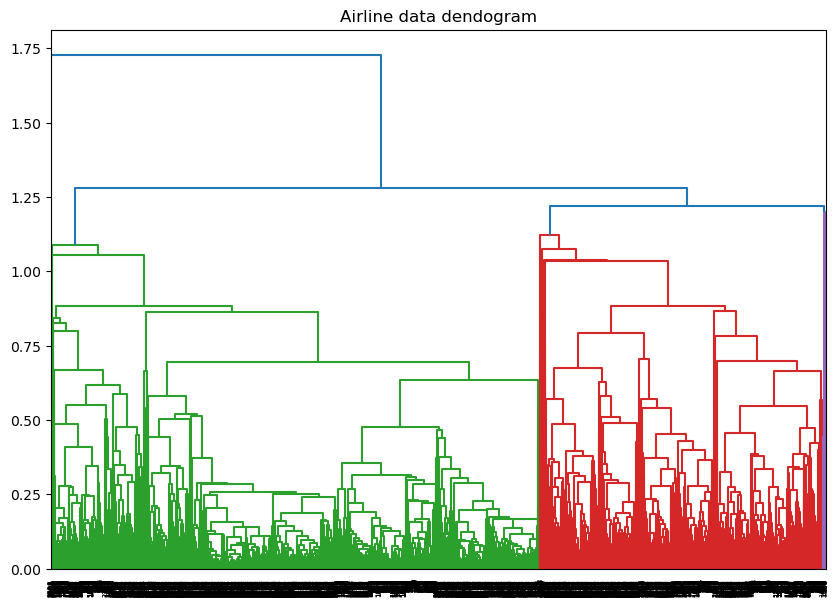

In [36]:


#construct dendogram
plt.figure(figsize=(10,7))
plt.title('Airline data dendogram')
#Generate a dendrogram using hierarchical clustering
dend = sch.dendrogram(sch.linkage(MM_x,method='average'))



In [37]:


#create cluster
ac = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')



In [62]:
# Fit Agglomerative Clustering to the normalized data (MM_x)
y = ac.fit_predict(MM_x)

# Create a DataFrame 'y4' to store the cluster labels
y4 = pd.DataFrame(y, columns=['clusters'])

# Concatenate the cluster labels with the original data 'fd'
y5 = pd.concat([fd, y4], axis=1)

# Display the resulting DataFrame
y5


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [63]:
y5.iloc[:,1:12].groupby(y5.clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusters,,,,,,,,,,,
0,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0
1,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


In [64]:


#k-means clustering

from sklearn.cluster import KMeans
KMeans()



KMeans()

In [65]:
# Apply k-means clustering with 5 clusters to the normalized data (MM_x)
kmeans=KMeans(n_clusters=5)
kmeans=kmeans.fit(MM_x)

In [66]:

# Calculate the inertia (sum of squared distances to the nearest cluster center) for different numbers of clusters
kmeans.inertia_
# Initialize an empty list 'clust' to store the inertia values for different cluster numbers
clust=[]
for i in range(1,11):
   kmeans = KMeans(n_clusters=i,random_state=0)
   kmeans.fit(MM_x)
    # Append the inertia value to the 'clust' list
   clust.append(kmeans.inertia_)
   clust
# 'clust' now contains the inertia values for different numbers of clusters


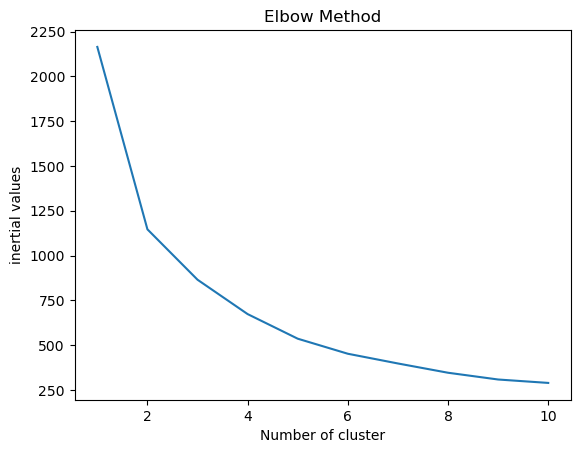

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),clust)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('inertial values')
plt.show()

In [68]:


model= KMeans(n_clusters=5)
model.fit(MM_x)
# Get the cluster labels assigned to each data point
model.labels_



array([3, 3, 3, ..., 1, 0, 0])

In [69]:
Clust=pd.DataFrame(model.labels_,columns=['kClust'])
# Concatenate the cluster labels with the original data 'fd' to create a new DataFrame 'y6'
y6=pd.concat([fd,Clust], axis=1)
y6

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kClust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [71]:


y6.iloc[:,1:12].groupby(y6.kClust).mean()



,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
kClust,,,,,,,,,,,
0,35385.638164,94.610261,1.204320,1.017102,1.006301,4400.907291,6.941494,214.288029,0.598560,1983.927093,0.0
1,78078.890152,274.411616,1.433081,1.027778,1.007576,10703.342172,11.363636,924.084596,2.804293,4072.556818,1.0
2,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0
3,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0
4,118863.698113,200.866473,4.074020,1.001451,1.030479,49828.551524,20.862119,780.963716,2.364296,5260.162554,1.0


In [74]:


#DBSCAN
# Selecting the features from the 'df' DataFrame
x=df.iloc[:,1:]
# Standardizing the selected features using StandardScaler
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_ss1= ss.fit_transform(x)
x_ss1



array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [75]:

from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [76]:


dbscan=DBSCAN(eps=0.8,min_samples=12)
dbscan.fit(x_ss1)



DBSCAN(eps=0.8, min_samples=12)

In [77]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [79]:
# Create a DataFrame 'c2' containing the cluster labels assigned by DBSCAN to each data point
c2=pd.DataFrame(dbscan.labels_,columns=['DBclust'])
# Concatenate the cluster labels with the original data 'df' to create a new DataFrame 'DBclust1'
DBclust1=pd.concat([df,c2],axis=1)
DBclust1




,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBclust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [82]:

# Filter data points labeled as noise (DBclust=-1) from the DBclust1 DataFrame and store it in the 'noisedata' variable
noisedata= DBclust1[DBclust1['DBclust']==-1]
# Print the 'noisedata' DataFrame to the standard output
print(noisedata)



       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
...    ...      ...         ...        ...        ...        ...          ...   
3974  3997    58387           0          3          1          1        14581   
3979  4002    57793           0          3          1          1        20959   
3980  4003    28867           0          3          1          1        19169   
3985  4008    59017           0          4          1          1        34746   
3991  4014    39142           0          3          1          1        14981   

      Bonus_trans  Flight_m

In [84]:

# Filter data points in DBclust1 DataFrame where 'DBclust' column is equal to 0
finaldata= DBclust1[DBclust1['DBclust']==0]
# Print the resulting DataFrame 'finaldata' to the standard output
print(finaldata)



       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
5        6    16420           0          1          1          1            0   
...    ...      ...         ...        ...        ...        ...          ...   
3990  4013    11310           0          1          1          1         5021   
3992  4015    11181           0          1          1          1          929   
3993  4016     3974           0          1          1          1          365   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [86]:
# Calculate the mean of selected columns (1 to 11) in the DBclust1 DataFrame, grouped by the 'DBclust' column
result_mean = DBclust1.iloc[:, 1:12].groupby(DBclust1.DBclust).mean()

# Display the result_mean DataFrame
result_mean


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
DBclust,,,,,,,,,,,
-1,153643.480331,592.975155,2.685300,1.060041,1.050725,34663.012422,19.590062,1587.557971,4.595238,4655.547619,0.628364
0,46273.354430,0.703235,1.556493,1.000000,1.000000,7397.959212,7.789498,80.463197,0.279419,3753.015940,0.000000
1,47313.197320,2.436054,2.347138,1.000000,1.000000,17414.952497,11.605359,157.247259,0.532278,4338.215591,1.000000
2,88517.735849,0.000000,5.000000,1.000000,1.000000,64327.037736,17.735849,80.301887,0.339623,5806.056604,1.000000
3,143829.166667,0.000000,5.000000,1.000000,1.000000,62086.083333,16.083333,58.166667,0.166667,5285.250000,0.000000
4,139251.214286,0.000000,5.000000,1.000000,1.000000,60420.071429,14.000000,35.714286,0.071429,2489.857143,0.000000
